In [12]:
import MDAnalysis as mda
import MDAnalysis.analysis.distances
import MDAnalysis.transformations
import os
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np


In [13]:
def get_universe(file_path: str) -> tuple:
    """
    get PARM7, DCD files and return universe
    """
    topology = file_path + "somd.prm7"
    trajectory = file_path + "traj000000002.dcd"
    if not os.path.isfile(trajectory):
        trajectory = file_path + "traj000000001.dcd"
    return mda.Universe(topology, trajectory, topology_format="PARM7")

In [14]:
path = f"../outputs/SOMD/lig_h_1~lig_h_14/bound/lambda_1.0000/"
universe = get_universe(path)
workflow = [mda.transformations.unwrap(universe.atoms)]
universe.trajectory.add_transformations(*workflow)
protein = universe.select_atoms("protein")
ligand = universe.select_atoms("resname LIG")

# Water mediated HB with R197 (220) and H250 (274)

In [15]:
histidine = universe.select_atoms("resid 250")
arginine = universe.select_atoms("resid 197")
waters = universe.select_atoms("resname WAT")

## Visualise

In [16]:
view = nv.show_mdanalysis(histidine+arginine+ligand)
view



NGLWidget(max_frame=499)

## Get waters

In [17]:
n_frames = universe.trajectory.n_frames
n_waters = len(waters)
close_waters = []
close_frames = []
waters_in_zone = []
for frame in range(n_frames):
    universe.trajectory[frame]
    spherical_zone = universe.select_atoms("resname WAT and (sphzone 3.0 ((name O1 and resid 17106) or ((name HE1 or name HE2) and resid 250) or ((name HH21 or name HH22) and resid 197)))")
    print(spherical_zone)
    resids = spherical_zone.resids
    search_set = set(resids)
    for search_value in search_set:
        indices = [i for i, value in enumerate(resids) if value == search_value]
        if len(indices) == 3:
            index = indices[0]
            print(f"selected {resids[index]}")
            waters_in_zone.append(spherical_zone.select_atoms(f"resid {resids[index]}"))
            close_frames.append(frame)

<AtomGroup [<Atom 32753: O of type OW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32754: H1 of type HW of resname WAT, resid 9849 and segid SYSTEM>]>
<AtomGroup [<Atom 32753: O of type OW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32754: H1 of type HW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32755: H2 of type HW of resname WAT, resid 9849 and segid SYSTEM>]>
selected 9849
<AtomGroup [<Atom 32753: O of type OW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32754: H1 of type HW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32755: H2 of type HW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32806: H2 of type HW of resname WAT, resid 9866 and segid SYSTEM>]>
selected 9849
<AtomGroup [<Atom 32558: O of type OW of resname WAT, resid 9784 and segid SYSTEM>, <Atom 32753: O of type OW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32754: H1 of type HW of resname WAT, resid 9849 and segid SYSTEM>, <Atom 32755: H2 of type HW of resname WAT, resid 9

## Get unique frames

In [18]:
unique_frames = []
water_residues = []
for i in range(1, len(close_frames), 1):
    if close_frames[i] != close_frames[i-1]:
        print(f"appending at i={i}")
        unique_frames.append(close_frames[i])
        water_residues.append(waters_in_zone[i])


appending at i=1
appending at i=2
appending at i=3
appending at i=4
appending at i=5
appending at i=6
appending at i=7
appending at i=8
appending at i=10
appending at i=11
appending at i=12
appending at i=13
appending at i=14
appending at i=15
appending at i=16
appending at i=17
appending at i=18
appending at i=19
appending at i=20
appending at i=21
appending at i=22
appending at i=23
appending at i=24
appending at i=25
appending at i=26
appending at i=27
appending at i=28
appending at i=29
appending at i=30
appending at i=31
appending at i=32
appending at i=33
appending at i=34
appending at i=35
appending at i=36
appending at i=37
appending at i=38
appending at i=39
appending at i=40
appending at i=42
appending at i=43
appending at i=44
appending at i=45
appending at i=46
appending at i=47
appending at i=48
appending at i=49
appending at i=50
appending at i=51
appending at i=52
appending at i=53
appending at i=54
appending at i=55
appending at i=56
appending at i=57
appending at i=58


## Get distances

In [19]:
ligand_water_distances = []
histidine_water_distances1, histidine_water_distances2 = [], []
arginine_water_distances1, arginine_water_distances2 = [], []
n_unique_frames = len(unique_frames)
for i in range(n_unique_frames):
    universe.trajectory[unique_frames[i]]
    print(f"at frame {unique_frames[i]}")
    water_resid = water_residues[i].atoms[0].resid
    water_com = universe.select_atoms(f"resid {water_resid}").center_of_mass()
    ligand_oxygen = ligand.select_atoms("name O1").atoms[0].position
    histidine_hydrogen1 = histidine.select_atoms("name HE1").atoms[0].position
    histidine_hydrogen2 = histidine.select_atoms("name HE2").atoms[0].position
    arginine_hydrogen1 = arginine.select_atoms("name HH21").atoms[0].position
    arginine_hydrogen2 = arginine.select_atoms("name HH22").atoms[0].position
    ligand_distance = mda.analysis.distances.distance_array(water_com, ligand_oxygen)[0][0]
    ligand_water_distances.append(ligand_distance)
    histidine_distance1 = mda.analysis.distances.distance_array(water_com, histidine_hydrogen1)[0][0]
    histidine_water_distances1.append(histidine_distance1)
    histidine_distance2 = mda.analysis.distances.distance_array(water_com, histidine_hydrogen2)[0][0]
    histidine_water_distances2.append(histidine_distance2)
    arginine_distance1 = mda.analysis.distances.distance_array(water_com, arginine_hydrogen1)[0][0]
    arginine_water_distances1.append(arginine_distance1)
    arginine_distance2 = mda.analysis.distances.distance_array(water_com, arginine_hydrogen2)[0][0]
    arginine_water_distances2.append(arginine_distance2)
        

at frame 2
at frame 3
at frame 4
at frame 5
at frame 6
at frame 7
at frame 9
at frame 10
at frame 11
at frame 12
at frame 13
at frame 14
at frame 15
at frame 16
at frame 17
at frame 18
at frame 19
at frame 20
at frame 21
at frame 22
at frame 23
at frame 24
at frame 25
at frame 26
at frame 27
at frame 28
at frame 29
at frame 30
at frame 31
at frame 32
at frame 33
at frame 34
at frame 35
at frame 36
at frame 37
at frame 38
at frame 39
at frame 40
at frame 41
at frame 42
at frame 43
at frame 44
at frame 45
at frame 46
at frame 48
at frame 49
at frame 50
at frame 53
at frame 54
at frame 55
at frame 56
at frame 57
at frame 63
at frame 65
at frame 71
at frame 72
at frame 73
at frame 74
at frame 75
at frame 76
at frame 77
at frame 78
at frame 79
at frame 80
at frame 81
at frame 82
at frame 83
at frame 84
at frame 85
at frame 86
at frame 87
at frame 88
at frame 89
at frame 90
at frame 92
at frame 93
at frame 94
at frame 95
at frame 96
at frame 97
at frame 98
at frame 107
at frame 108
at frame 

In [30]:
times = [universe.trajectory[frame].time for frame in unique_frames]

In [31]:
print(np.mean(ligand_water_distances), np.std(ligand_water_distances))
print(np.mean(histidine_water_distances1), np.std(histidine_water_distances1))
print(np.mean(histidine_water_distances2), np.std(histidine_water_distances2))
print(np.mean(arginine_water_distances1), np.std(arginine_water_distances1))
print(np.mean(arginine_water_distances2), np.std(arginine_water_distances2))

6.883653114905717 1.4078424648094625
3.8280471528996163 0.7900826621560216
3.356812516028373 0.8288720261670789
3.681547360059066 0.759014008297248
3.8399847425810187 0.6584038943057919


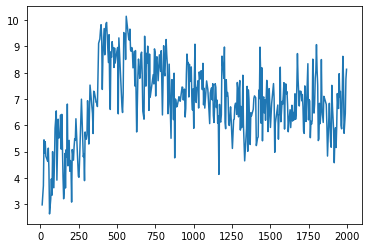

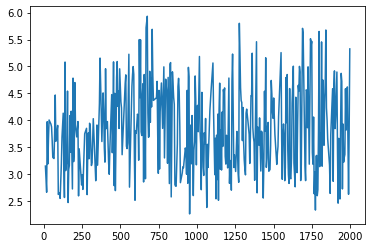

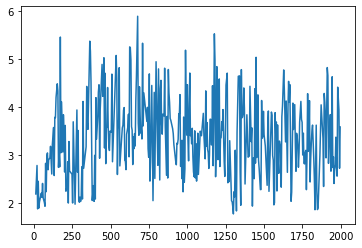

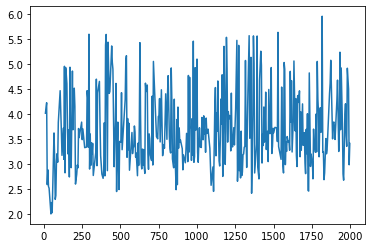

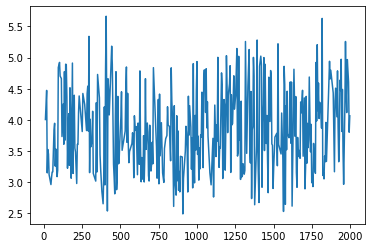

In [32]:
plt.plot(times, ligand_water_distances)
plt.show()
plt.plot(times, histidine_water_distances1)
plt.show()
plt.plot(times, histidine_water_distances2)
plt.show()
plt.plot(times, arginine_water_distances1)
plt.show()
plt.plot(times, arginine_water_distances2)
plt.show()

## Save data

In [33]:
save_array = np.array([times, ligand_water_distances, histidine_water_distances1, histidine_water_distances2, arginine_water_distances1, arginine_water_distances2])
np.save("../outputs/water_hb_ligand_14_his_arg.npy", save_array)

# Water-mediated hydrogen bond between phosphonate group and T193 (T216)

In [ ]:
threonine = protein.select_atoms("resid 193")
phosphonate = ligand.select_atoms("name C10 H4 H5 O12 O13 O14 H11")
waters = universe.select_atoms("resname WAT")
threonine_hb_atoms = threonine.select_atoms("name O HB HG21 HG22 HG23")

## Find waters 

In [83]:
n_frames = universe.trajectory.n_frames
n_waters = len(waters)
close_waters = []
close_frames = []
waters_in_zone = []
for frame in range(n_frames):
    universe.trajectory[frame]
    spherical_zone = universe.select_atoms("resname WAT and (sphzone 3.0 ((name H11 and resid 17106) or (name O and resid 193)))")
    resids = spherical_zone.resids
    search_set = set(resids)
    for search_value in search_set:
        indices = [i for i, value in enumerate(resids) if value == search_value]
        if len(indices) == 3:
            index = indices[0]
            print(f"selected {resids[index]}")
            waters_in_zone.append(spherical_zone.select_atoms(f"resid {resids[index]}"))
            close_frames.append(frame)

selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 9891
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected 10439
selected

## Get unique frames

In [84]:
unique_frames = []
water_residues = []
for i in range(1, len(close_frames), 1):
    if close_frames[i] != close_frames[i-1]:
        print(f"appending at i={i}")
        unique_frames.append(close_frames[i])
        water_residues.append(waters_in_zone[i])


appending at i=1
appending at i=2
appending at i=3
appending at i=4
appending at i=5
appending at i=6
appending at i=7
appending at i=8
appending at i=9
appending at i=10
appending at i=11
appending at i=12
appending at i=13
appending at i=14
appending at i=15
appending at i=16
appending at i=17
appending at i=18
appending at i=19
appending at i=20
appending at i=21
appending at i=22
appending at i=23
appending at i=24
appending at i=25
appending at i=26
appending at i=27
appending at i=28
appending at i=29
appending at i=30
appending at i=31
appending at i=32
appending at i=33
appending at i=34
appending at i=35
appending at i=36
appending at i=37
appending at i=38
appending at i=39
appending at i=40
appending at i=41
appending at i=42
appending at i=43
appending at i=44
appending at i=45
appending at i=46
appending at i=47
appending at i=48
appending at i=49
appending at i=50
appending at i=51
appending at i=52
appending at i=53
appending at i=54
appending at i=55
appending at i=56
a

In [90]:
len(water_residues)

123

## Get distances

In [96]:
ligand_water_distances = []
threonine_water_distances = []
n_unique_frames = len(unique_frames)
for i in range(n_unique_frames):
    universe.trajectory[unique_frames[i]]
    print(f"at frame {unique_frames[i]}")
    water_resid = water_residues[i].atoms[0].resid
    water_com = universe.select_atoms(f"resid {water_resid}").center_of_mass()
    ligand_hydrogen = ligand.select_atoms("name H11").atoms[0].position
    threonine_oxygen = threonine.select_atoms("name O").atoms[0].position
    ligand_distance = mda.analysis.distances.distance_array(water_com, ligand_hydrogen)[0][0]
    ligand_water_distances.append(ligand_distance)
    threonine_distance = mda.analysis.distances.distance_array(water_com, threonine_oxygen)[0][0]
    threonine_water_distances.append(threonine_distance)
        

at frame 3
at frame 4
at frame 5
at frame 6
at frame 7
at frame 8
at frame 9
at frame 10
at frame 11
at frame 12
at frame 13
at frame 14
at frame 29
at frame 30
at frame 31
at frame 33
at frame 34
at frame 35
at frame 36
at frame 37
at frame 38
at frame 39
at frame 40
at frame 41
at frame 42
at frame 44
at frame 45
at frame 46
at frame 49
at frame 50
at frame 51
at frame 52
at frame 53
at frame 54
at frame 55
at frame 56
at frame 57
at frame 58
at frame 59
at frame 60
at frame 61
at frame 62
at frame 63
at frame 64
at frame 65
at frame 66
at frame 67
at frame 68
at frame 69
at frame 70
at frame 71
at frame 72
at frame 73
at frame 74
at frame 75
at frame 76
at frame 77
at frame 78
at frame 79
at frame 80
at frame 81
at frame 82
at frame 83
at frame 84
at frame 85
at frame 86
at frame 87
at frame 89
at frame 90
at frame 91
at frame 92
at frame 93
at frame 94
at frame 97
at frame 98
at frame 99
at frame 100
at frame 101
at frame 102
at frame 103
at frame 104
at frame 105
at frame 107
at f

In [97]:
times = [universe.trajectory[frame].time for frame in unique_frames]

In [98]:
len(threonine_water_distances)

123

In [99]:
print(np.mean(ligand_water_distances), np.std(ligand_water_distances))
print(np.mean(threonine_water_distances), np.std(threonine_water_distances))

3.5732177475251494 0.928736420612329
2.7998616243857177 0.2358352912999646


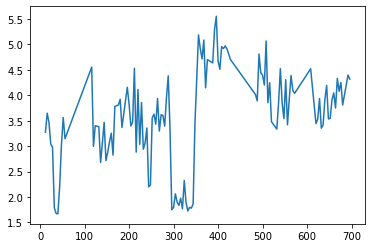

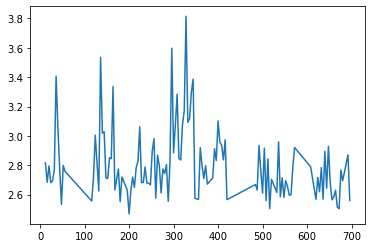

In [100]:
plt.plot(times, ligand_water_distances)
plt.show()
plt.plot(times, threonine_water_distances)
plt.show()

## Save data

### ligand 2

In [81]:

save_array = np.array([times, ligand_water_distances, threonine_water_distances])
np.save("../outputs/water_hb_ligand_2.npy", save_array)

### ligand 13

In [101]:
# ligand 13
save_array = np.array([times, ligand_water_distances, threonine_water_distances])
np.save("../outputs/water_hb_ligand_13.npy", save_array)

# Playground


In [52]:
close_waters_string = str(close_resids).replace("{","").replace("}","").replace(",","")
test = waters.select_atoms(f"resid {close_waters_string}")
view = nv.show_mdanalysis(ligand+test+threonine)
view.add_surface("protein", opacity=0.5)
view.add_representation("ball+stick")
view

NGLWidget(max_frame=499)

In [7]:
n_frames = len(universe.trajectory)
water_residues = waters.residues.resids
times = []
# uncomment for testing
# n_frames = 100
for frame in range(n_frames):
    universe.trajectory[frame]
    print(f"at frame {frame}")
    phosphonate_com = phosphonate.center_of_mass()
    threonine_oxygen = threonine_hb_atoms.select_atoms("name O").center_of_mass()
    # threonine_hb_com = threonine_hb_atoms.center_of_mass()
    water_positions = [water.position for water in waters]
    print("getting distances")
    water_phosphonate_distances = [mda.analysis.distances.distance_array(phosphonate_com, water_position)[0][0] for water_position in water_positions]
    water_threonine_distances = [mda.analysis.distances.distance_array(threonine_oxygen, water_position)[0][0] for water_position in water_positions]
    print("done getting distances")
    
    phosphonate_waters = [waters[i].resid for i in range(len(waters)) if water_phosphonate_distances[i] <= 5.0]
    threonine_waters = [waters[i].resid for i in range(len(waters)) if water_threonine_distances[i] <= 5.0]
    
    times.append(universe.trajectory[frame].time)

# for i in range(len(water_phosphonate_distances)):
    # if water_phosphonate_distances[i] <= 6.0:
        # test.append(waters[i].resids)

# [y for y in a if y not in b]
    

at frame 0
getting distances
done getting distances
at frame 1
getting distances
done getting distances
at frame 2
getting distances
done getting distances
at frame 3
getting distances
done getting distances
at frame 4
getting distances
done getting distances
at frame 5
getting distances
done getting distances
at frame 6
getting distances
done getting distances
at frame 7
getting distances
done getting distances
at frame 8
getting distances
done getting distances
at frame 9
getting distances
done getting distances
at frame 10
getting distances
done getting distances
at frame 11
getting distances
done getting distances
at frame 12
getting distances
done getting distances
at frame 13
getting distances
done getting distances
at frame 14
getting distances
done getting distances
at frame 15
getting distances
done getting distances
at frame 16
getting distances
done getting distances
at frame 17
getting distances
done getting distances
at frame 18
getting distances
done getting distances
at 

In [ ]:
close_waters

In [ ]:
close_waters_string = str(close_waters.resids).replace("[", "").replace("]","").replace(",", "")
close_waters = waters.select_atoms(f"resid {close_waters_string}")
for i in range(len(close_frames)):
    

In [20]:
close_waters_string = str(close_waters.resids).replace("[", "").replace("]","").replace(",", "")
close_waters = waters.select_atoms(f"resid {close_waters_string}")
active_site = ligand+threonine+close_waters
view = nv.show_mdanalysis(active_site)
view.add_surface("protein", opacity=0.6)
view.add_representation("ball+stick")

view


NGLWidget(max_frame=499)

In [7]:
active_site_and_all_waters = ligand+threonine+waters
view=nv.show_mdanalysis(active_site_and_all_waters)
view.add_representation("ball+stick")
view.add_surface("protein", color="white", opacity=0.6)
view

NGLWidget(max_frame=499)

In [90]:
water = waters.select_atoms("name H1 and resid 7405").positions
water

array([[20.6256 , 67.02602, 71.53808]], dtype=float32)

In [14]:
phosphonate_distances = []
threonine_distances = []
time = []
for frame in range(len(universe.trajectory)):
    universe.trajectory[frame]
    print(f"at frame {frame}")
    hydrogen1 = waters.select_atoms("name H1 and resid 9772").positions
    hydrogen2 = waters.select_atoms("name H2 and resid 9772").positions
    phosphonate_oxygen = phosphonate.select_atoms("name O13").positions
    threonine_oxygen = threonine.select_atoms("name O").positions
    phosphonate_distance = mda.analysis.distances.distance_array(phosphonate_oxygen, hydrogen2)
    phosphonate_distances.append(phosphonate_distance)
    threonine_distance = mda.analysis.distances.distance_array(threonine_oxygen, hydrogen1)
    threonine_distances.append(threonine_distance)
    times.append(universe.trajectory[frame].time)


at frame 0
at frame 1
at frame 2
at frame 3
at frame 4
at frame 5
at frame 6
at frame 7
at frame 8
at frame 9
at frame 10
at frame 11
at frame 12
at frame 13
at frame 14
at frame 15
at frame 16
at frame 17
at frame 18
at frame 19
at frame 20
at frame 21
at frame 22
at frame 23
at frame 24
at frame 25
at frame 26
at frame 27
at frame 28
at frame 29
at frame 30
at frame 31
at frame 32
at frame 33
at frame 34
at frame 35
at frame 36
at frame 37
at frame 38
at frame 39
at frame 40
at frame 41
at frame 42
at frame 43
at frame 44
at frame 45
at frame 46
at frame 47
at frame 48
at frame 49
at frame 50
at frame 51
at frame 52
at frame 53
at frame 54
at frame 55
at frame 56
at frame 57
at frame 58
at frame 59
at frame 60
at frame 61
at frame 62
at frame 63
at frame 64
at frame 65
at frame 66
at frame 67
at frame 68
at frame 69
at frame 70
at frame 71
at frame 72
at frame 73
at frame 74
at frame 75
at frame 76
at frame 77
at frame 78
at frame 79
at frame 80
at frame 81
at frame 82
at frame 83
at

In [15]:
phosphonate_dist = [phosphonate_distances[i][0][0] for i in range(len(phosphonate_distances))] 
threonine_dist = [threonine_distances[i][0][0] for i in range(len(threonine_distances))]

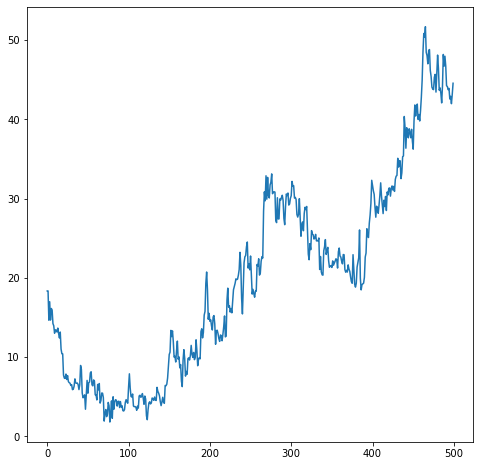

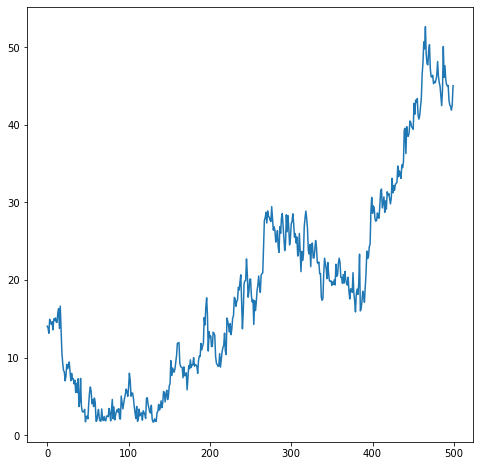

In [16]:
frames = np.arange(0, universe.trajectory.n_frames)

plt.figure(figsize=(8,8))
plt.plot(frames[:], phosphonate_dist[:])
plt.figure(figsize=(8,8))
plt.plot(frames[:], threonine_dist[:])
plt.show()

In [57]:
test_tuple = []
for i in range(len(water_phosphonate_distances)):
    if water_phosphonate_distances[i] <= 40.0:
        test_tuple.append((times[i]))

50502

In [ ]:
test

271

In [59]:
len(water_phosphonate_distances)

50502